### Linear Regression

In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

#Reading data
data = pd.read_csv(r'C:\Users\TMR\Desktop\DataScience\DataSets\headbrain.csv')#Add r
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [32]:
# collecting x and y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [33]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2

number = 0
denom = 0
for i in range(m):
    number += (X[i] - mean_x)*(Y[i]-mean_y)  
    denom += (X[i] - mean_x) ** 2
b1 = number/denom #b = sum(Y -Y')(X -X') / sum(X -X')^2
b0 = mean_y - (b1 * mean_x)  # for y = b1x + b0

# print coefficient
print(b1, b0)

0.26342933948939945 325.57342104944223


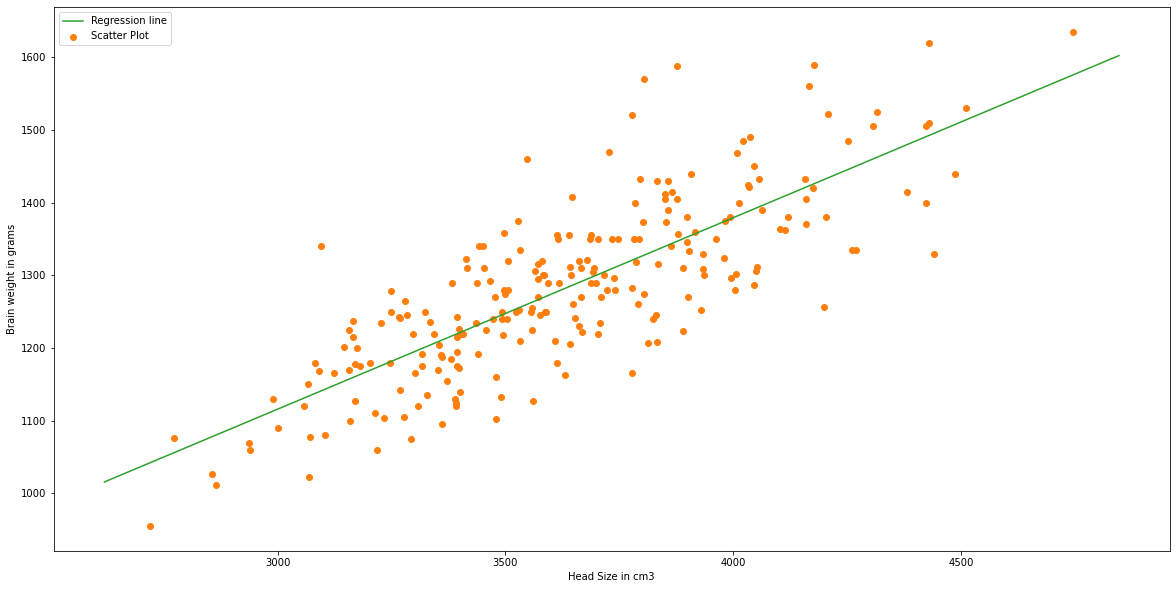

In [36]:
#plotting values and Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# calculating line Values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# ploting Line
plt.plot(x, y, color='#2ca02c', label = 'Regression line') # '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
# ploting scatter points
plt.scatter(X, Y, c='#ff7f0e', label = 'Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()

### check how much valid
#### R^2 method

In [37]:
# R^2 method -- check how much valid
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y)**2
    ss_r += (Y[i] - y_pred)**2
r2 = 1 - (ss_r/ss_t)
print(r2)


0.6393117199570003


#### mean_squared_error method

In [38]:
#mean_squared_error method
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m,1))
#Creating Model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X, Y)
# Y prediction
Y_pred = reg.predict(X)

# Calculating R2 Score

r2_score = reg.score(X,Y)
print(r2_score)

0.639311719957
